# Task 4.9 HW: Intro to Data Visualizations -- Part 2

### 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create a shortcut for project folder path as a string.
path = r'/Users/cboyd/Documents/01-2022 Instacart Basket Analysis'

In [3]:
# Check path worked
path

'/Users/cboyd/Documents/01-2022 Instacart Basket Analysis'

In [5]:
# Import the “orders_products_customers_merged_4.9.1” data set into notebook.
df_ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged_4.9.1.pkl'))

In [6]:
# CHECK
df_ords_prods_cust_merge.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order  first_time_customer  product_id  add_to_cart_order  \
0                     NaN                 True         196                  1   
1                     NaN                 True       14084                  2   
2                     NaN                 True       12427                  3   
3                     NaN                 True       26088                  4   
4                     NaN                 True       26405                  5   

   reordered  ...         frequency_flag  first_name  last_name  gender  \
0          0  ...  Non-frequent customer       Linda     Nguyen  Female   
1          0  ...  Non-frequent customer       Linda     Nguyen  Female   
2          0  ...  Non-frequent customer       Linda     Nguyen  Female   
3          0  ...  Non-frequent customer       Linda     Nguyen  Female   
4          0  ...  Non-frequent customer       Linda     Nguyen  Female   

     state age date_joined  number_of_dependants fam_status  income  
0  Alabama  31   2/17/2019                     3    married   40423  
1  Alabama  31   2/17/2019                     3    married   40423  
2  Alabama  31   2/17/2019                     3    married   40423  
3  Alabama  31   2/17/2019                     3    married   40423  
4  Alabama  31   2/17/2019                     3    married   40423  

[5 rows x 32 columns]

In [16]:
df_ords_prods_cust_merge.shape

(32435059, 32)

#### NOTE--ONLY 20/32 VARIABLES ARE SHOWN!

### 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### *See Task 4.9: Exercise script*

### 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

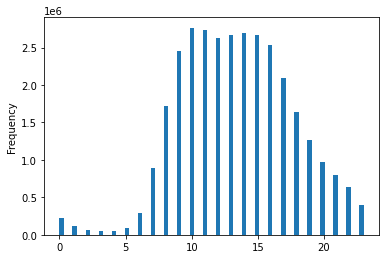

In [15]:
# Histogram
hist = df_ords_prods_cust_merge['order_hour_of_day'].plot.hist(bins = 70)

#### This histogram is showing how many orders are placed for each hour of the day (1-24). 11am is the busiest and 4am is the slowest. The peak hours are 10am to 5pm, while the slow hours are 1am-6am.

### 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

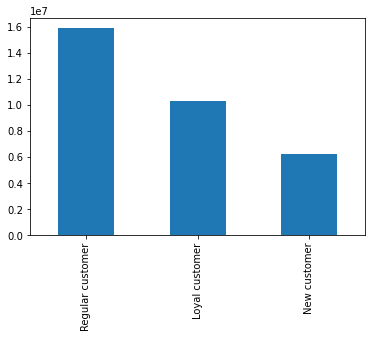

In [19]:
bar = df_ords_prods_cust_merge['loyalty_flag'].value_counts().plot.bar()

#### Regular customers (those who have placed less than or equal to 40 orders) are the most common shoppers (15,891,507), the loyal customers (those who have placed more than 40 orders) are in the middle (10,294,027), and new customers are the lowest (6,249,525). 

### 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [20]:
# I will use a 70/30 split of random samples holding true/false values of the dataframe
# #Setting the random seed
np.random.seed(4)

In [21]:
# list storing boolean values
dev = np.random.rand(len(df_ords_prods_cust_merge)) <= 0.7

In [22]:
# Check
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
dev.shape

(32435059,)

In [24]:
# Now split df into two samples.
# # store 70% in df "big"
big = df_ords_prods_cust_merge[dev]

In [25]:
# Store 30% in df "small"
small = df_ords_prods_cust_merge[~dev]

In [26]:
# Check work
len(df_ords_prods_cust_merge)

32435059

In [27]:
len(big)+len(small)

32435059

In [30]:
# Create smaller df with less variables (only ones we need) to speed up processing using small 30% sample
df_2 = small[['order_hour_of_day', 'prices']]

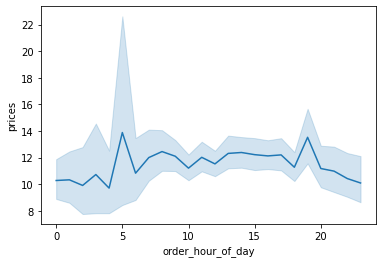

In [31]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

#### The most money is being spent at 5am, followed by 7pm... which makes sense as people often shop before and after traditonal working hours, and the higher spending between those hours are likely those who don't work, 2nd/3rd shift workers, or have the day off.

### 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

In [34]:
# Create smaller df with less variables (only ones we need) to speed up processing
df_3 = df_ords_prods_cust_merge[['age', 'number_of_dependants']]

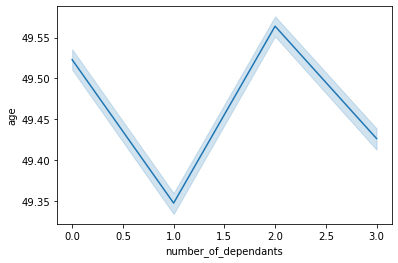

In [35]:
# Create line chart
line_3 = sns.lineplot(data = df_3, x = 'number_of_dependants', y = 'age')

In [36]:
# Find the average age
df_ords_prods_cust_merge['age'].mean()

49.46512389572037

In [39]:
# Find the minimum age
df_ords_prods_cust_merge['age'].min()

18

In [40]:
# Find the max age
df_ords_prods_cust_merge['age'].max()

81

#### The linechart ONLY shows the average number of dependants for customers who are the average age (49.47) for instacart. Not superrr helpful...

### 7. You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

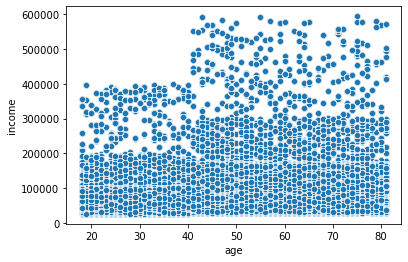

In [41]:
# Make a scatterplot for age and income
scatter = sns.scatterplot(data = df_ords_prods_cust_merge, x = 'age', y = 'income')

#### This scatterplot shows there is a slight positive correlation between spending power (income) and age. As the age increases, there is more buying power. Additionally, after the age of 40, there is more noticable buying power with customers. 

### 8. Export your visualizations as “.png” files in your relevant project folder.

In [42]:
# 1 order_hour_hist.png
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_hist.png'))

In [43]:
# 2 loyalty_flag_bar.png
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

In [44]:
# 3 order_hour_prices_line.png
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

In [45]:
# 4 dependants_age_line.png
line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependants_age_line.png'))

In [46]:
# 5 age_income.png
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))